# Early Stage Diabetes Risk Prediction 

### Problem Statement
Diabetes is a long-lasting disease triggered by expanded sugar levels in human blood and can affect various organs if left untreated. It contributes to heart disease, kidney issues, damaged nerves, damaged blood vessels, and blindness. Timely disease prediction can save precious lives and enable healthcare advisors to take care of the conditions. Most diabetic patients know little about the risk factors they face before diagnosis. Nowadays, hospitals deploy basic information systems, which generate vast amounts of data that cannot be converted into proper/useful information and cannot be used to support decision making for clinical purposes. The only method of preventing diabetes complications is to identify and treat the disease early. 

### Feature Description

    •Age 1.20-65
    •Sex 1. Male, 2.Female
    •Polyuria 1.Yes, 2.No
    •Polydipsia 1.Yes, 2.No
    •sudden weight loss 1.Yes, 2.No
    •weakness 1.Yes, 2.No
    •Polyphagia 1.Yes, 2.No
    •Genital thrush 1.Yes, 2.No
    •visual blurring 1.Yes, 2.No
    •Itching 1.Yes, 2.No
    •Irritability 1.Yes, 2.No
    •delayed healing 1.Yes, 2.No
    •partial paresis 1.Yes, 2.No
    •muscle stiffness 1.Yes, 2.No
    •Alopecia 1.Yes, 2.No
    •Obesity 1.Yes, 2.No
    •Class 1.Positive, 2.Negative

In [2]:
# Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import *
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

### Data Acquisition

In [3]:
data=pd.read_csv('diabetes_data.csv')

## Exploratory Data Analysis

### Basic EDA

In [4]:
#First Five Rows of the dataset
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
#Last five rows of the dataset
data.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [6]:
#Number of rows and columns
data.shape

(520, 17)

In [7]:
#View column names
data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [8]:
#Statistical Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [9]:
data.describe(include='all')

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset has more categorical features(0s and 1s) except age. The dataset has 520 observations for analysis,the average age of individuals in the dataset is 48, the youngest individual is 16 years of age and the oldest is 90 years. There are more males with 328 occurences in the dataset, also we have more individuals that are susceptible to be diabetic (class = positive) in the dataset.

In [10]:
#Checking null values
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

There are no missing values in the dataset

### Data Visualization

#### Class

([<matplotlib.patches.Wedge at 0x25ccb7f06a0>,
 [Text(-0.39006544982124386, 1.0285178388612184, 'Positive'),
  Text(0.39006554611803196, -1.0285178023406505, 'Negative')],
 [Text(-0.21276297262976934, 0.5610097302879372, "''61.54%'"),
  Text(0.21276302515529014, -0.5610097103676275, "''38.46%'")])

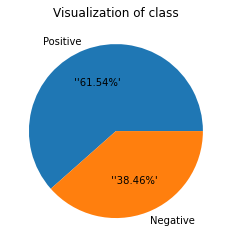

In [11]:
left_names=data["class"].value_counts().index
left_val=data["class"].value_counts().values
plt.title("Visualization of class")
plt.pie(left_val, labels=left_names, autopct="''%1.2f%%'")

Most of the cases are positive.

#### Age

In [12]:
def age(i):
    for x in range(10,100,10):
        if i<x:
            m=f'{x-10}-{x}'
            return m
visual=data.copy()
visual['age_group']=data['Age'].apply(lambda x:age(x))
visual['age_group'].value_counts()

40-50    151
50-60    130
30-40    124
60-70     76
20-30     19
70-80     15
80-90      2
10-20      1
Name: age_group, dtype: int64

In [13]:
visual['class'].groupby(visual['age_group']).value_counts()

age_group  class   
10-20      Positive     1
20-30      Negative    12
           Positive     7
30-40      Positive    77
           Negative    47
40-50      Positive    88
           Negative    63
50-60      Positive    81
           Negative    49
60-70      Positive    56
           Negative    20
70-80      Negative     9
           Positive     6
80-90      Positive     2
Name: class, dtype: int64

Text(0.5, 1.0, 'Age_Group Vs Class')

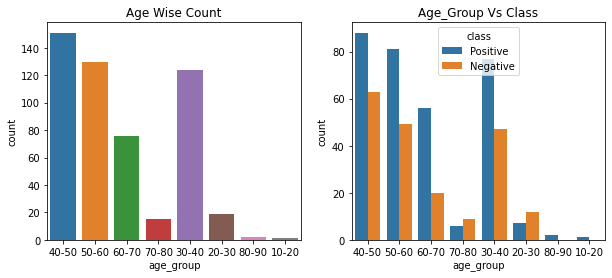

In [14]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(x='age_group', data=visual, ax=ax[0])
ax[0].set_title("Age Wise Count")
sns.countplot(x='age_group',hue='class',data=visual,ax=ax[1])
ax[1].set_title("Age_Group Vs Class")

From the left plot, We found that most of the tested patients are between the age group of 40-50, followed by 50-60 and so on. And from the right plot, Age group of 40-50 count of around 80 from 151 are tested positive

#### Gender

In [15]:
data['Gender'].value_counts()

Male      328
Female    192
Name: Gender, dtype: int64

In [16]:
data['class'].groupby(data['Gender']).value_counts()

Gender  class   
Female  Positive    173
        Negative     19
Male    Negative    181
        Positive    147
Name: class, dtype: int64

Text(0.5, 1.0, 'Gender Vs Class')

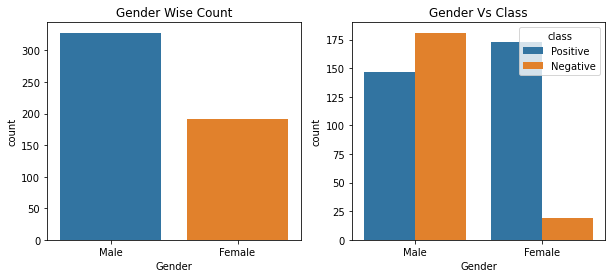

In [17]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(x='Gender', data=data, ax=ax[0])
ax[0].set_title("Gender Wise Count")
sns.countplot(x='Gender',hue='class',data=data,ax=ax[1])
ax[1].set_title("Gender Vs Class")

We can find that from 192 women patients, 173 are tested positive and from 328 men patients, 147 are tested positive.

#### Polyuria

In [18]:
data['Polyuria'].value_counts()

No     262
Yes    258
Name: Polyuria, dtype: int64

In [19]:
data['class'].groupby(data['Polyuria']).value_counts()

Polyuria  class   
No        Negative    185
          Positive     77
Yes       Positive    243
          Negative     15
Name: class, dtype: int64

Text(0.5, 1.0, 'Polyuria Vs Class')

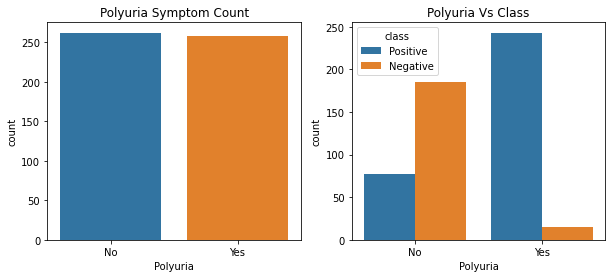

In [20]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(x='Polyuria', data=data, ax=ax[0])
ax[0].set_title("Polyuria Symptom Count")
sns.countplot(x='Polyuria',hue='class',data=data,ax=ax[1])
ax[1].set_title("Polyuria Vs Class")

Out of 258 who have polyuria symptoms, 243 are tested positive and out of 262 who have no symptoms, 77 are tested positive

#### Polydipsis

In [21]:
data['Polydipsia'].value_counts()

No     287
Yes    233
Name: Polydipsia, dtype: int64

In [22]:
data['class'].groupby(data['Polydipsia']).value_counts()

Polydipsia  class   
No          Negative    192
            Positive     95
Yes         Positive    225
            Negative      8
Name: class, dtype: int64

Text(0.5, 1.0, 'Polydipsia Vs Class')

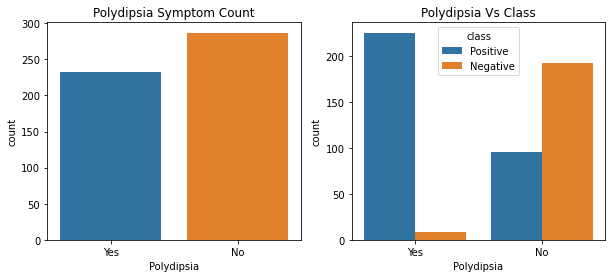

In [23]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(x='Polydipsia', data=data, ax=ax[0])
ax[0].set_title("Polydipsia Symptom Count")
sns.countplot(x='Polydipsia',hue='class',data=data,ax=ax[1])
ax[1].set_title("Polydipsia Vs Class")

Out of 233 who have polydipsia symptom, 225 were tested positive.

#### Sudden Weight Loss

In [24]:
data['sudden weight loss'].value_counts()

No     303
Yes    217
Name: sudden weight loss, dtype: int64

In [25]:
data['class'].groupby(data['sudden weight loss']).value_counts()

sudden weight loss  class   
No                  Negative    171
                    Positive    132
Yes                 Positive    188
                    Negative     29
Name: class, dtype: int64

Text(0.5, 1.0, 'sudden weight loss Vs Class')

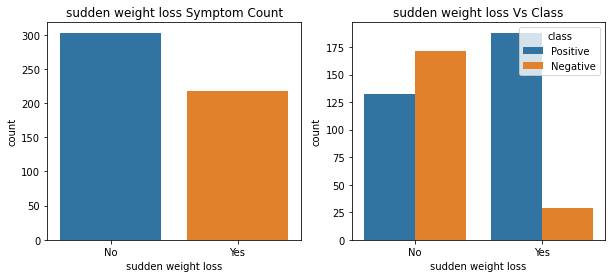

In [26]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(x='sudden weight loss', data=data, ax=ax[0])
ax[0].set_title("sudden weight loss Symptom Count")
sns.countplot(x='sudden weight loss',hue='class',data=data,ax=ax[1])
ax[1].set_title("sudden weight loss Vs Class")

Out of 217 who had sudden weight loss, 188 were tested positive.

#### Weakness

In [27]:
data['weakness'].value_counts()

Yes    305
No     215
Name: weakness, dtype: int64

In [28]:
data['class'].groupby(data['weakness']).value_counts()

weakness  class   
No        Negative    113
          Positive    102
Yes       Positive    218
          Negative     87
Name: class, dtype: int64

Text(0.5, 1.0, 'Weakness Vs Class')

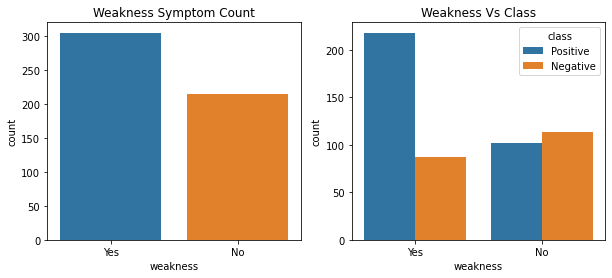

In [29]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(x='weakness', data=data, ax=ax[0])
ax[0].set_title("Weakness Symptom Count")
sns.countplot(x='weakness',hue='class',data=data,ax=ax[1])
ax[1].set_title("Weakness Vs Class")

Out of 305 who are weak, 218 are tested positive

#### Polyphagia

In [30]:
data['Polyphagia'].value_counts()

No     283
Yes    237
Name: Polyphagia, dtype: int64

In [31]:
data['class'].groupby(data['Polyphagia']).value_counts()

Polyphagia  class   
No          Negative    152
            Positive    131
Yes         Positive    189
            Negative     48
Name: class, dtype: int64

Text(0.5, 1.0, 'Polyphagia Vs Class')

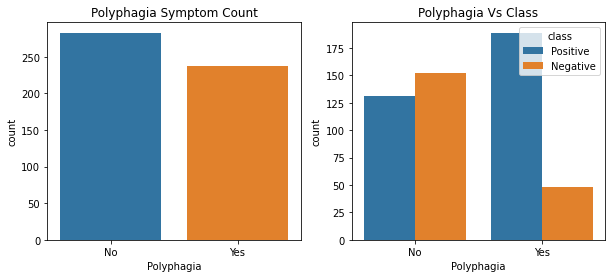

In [32]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(x='Polyphagia', data=data, ax=ax[0])
ax[0].set_title("Polyphagia Symptom Count")
sns.countplot(x='Polyphagia',hue='class',data=data,ax=ax[1])
ax[1].set_title("Polyphagia Vs Class")

Out of 237 who have Polyphagia, 189 are tested positive

#### Genital thrush

In [33]:
data['Genital thrush'].value_counts()

No     404
Yes    116
Name: Genital thrush, dtype: int64

In [34]:
data['class'].groupby(data['Genital thrush']).value_counts()

Genital thrush  class   
No              Positive    237
                Negative    167
Yes             Positive     83
                Negative     33
Name: class, dtype: int64

Text(0.5, 1.0, 'Genital thrush Vs Class')

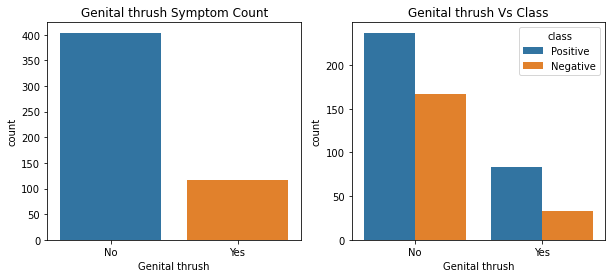

In [35]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(x='Genital thrush', data=data, ax=ax[0])
ax[0].set_title("Genital thrush Symptom Count")
sns.countplot(x='Genital thrush',hue='class',data=data,ax=ax[1])
ax[1].set_title("Genital thrush Vs Class")

Out of 116 who have genital thrush, 83 are tested positive.

#### Visual blurring

In [36]:
data['visual blurring'].value_counts()

No     287
Yes    233
Name: visual blurring, dtype: int64

In [37]:
data['class'].groupby(data['visual blurring']).value_counts()

visual blurring  class   
No               Positive    145
                 Negative    142
Yes              Positive    175
                 Negative     58
Name: class, dtype: int64

Text(0.5, 1.0, 'visual blurring Vs Class')

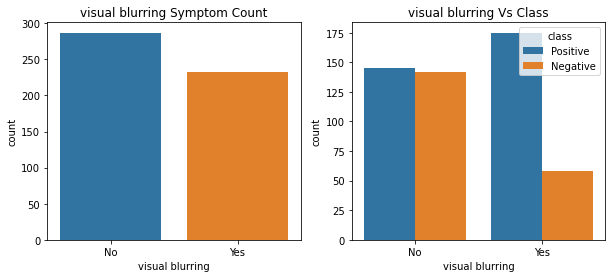

In [38]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(x='visual blurring', data=data, ax=ax[0])
ax[0].set_title("visual blurring Symptom Count")
sns.countplot(x='visual blurring',hue='class',data=data,ax=ax[1])
ax[1].set_title("visual blurring Vs Class")

Out of 233 who have visual blurring, 175 are tested positive

#### Itching

In [39]:
data['Itching'].value_counts()

No     267
Yes    253
Name: Itching, dtype: int64

In [40]:
data['class'].groupby(data['Itching']).value_counts()

Itching  class   
No       Positive    166
         Negative    101
Yes      Positive    154
         Negative     99
Name: class, dtype: int64

Text(0.5, 1.0, 'Itching Vs Class')

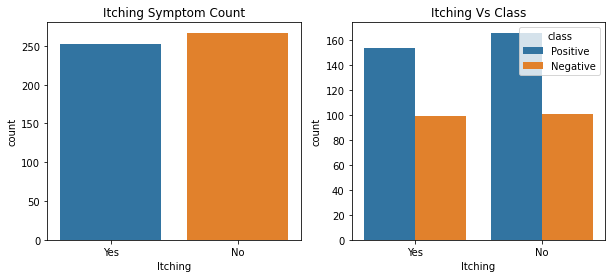

In [41]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(x='Itching', data=data, ax=ax[0])
ax[0].set_title("Itching Symptom Count")
sns.countplot(x='Itching',hue='class',data=data,ax=ax[1])
ax[1].set_title("Itching Vs Class")

Out of 253 who have itching, 154 are tested positive

#### Irritability

In [42]:
data['Irritability'].value_counts()

No     394
Yes    126
Name: Irritability, dtype: int64

In [43]:
data['class'].groupby(data['Irritability']).value_counts()

Irritability  class   
No            Positive    210
              Negative    184
Yes           Positive    110
              Negative     16
Name: class, dtype: int64

Text(0.5, 1.0, 'Irritability Vs Class')

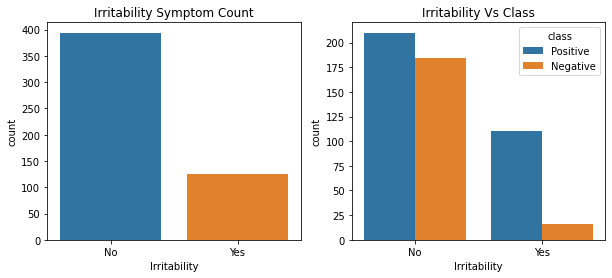

In [44]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(x='Irritability', data=data, ax=ax[0])
ax[0].set_title("Irritability Symptom Count")
sns.countplot(x='Irritability',hue='class',data=data,ax=ax[1])
ax[1].set_title("Irritability Vs Class")

Out of 126 who have irritation, 110 are tested positive.

#### Delayed healing

In [45]:
data['delayed healing'].value_counts()

No     281
Yes    239
Name: delayed healing, dtype: int64

In [46]:
data['class'].groupby(data['delayed healing']).value_counts()

delayed healing  class   
No               Positive    167
                 Negative    114
Yes              Positive    153
                 Negative     86
Name: class, dtype: int64

Text(0.5, 1.0, 'delayed healing Vs Class')

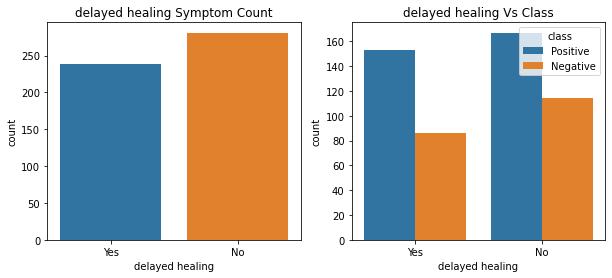

In [47]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(x='delayed healing', data=data, ax=ax[0])
ax[0].set_title("delayed healing Symptom Count")
sns.countplot(x='delayed healing',hue='class',data=data,ax=ax[1])
ax[1].set_title("delayed healing Vs Class")

Out of 239 who have delayed healing, 153 are tested positive.

#### Partial paresis

In [48]:
data['partial paresis'].value_counts()

No     296
Yes    224
Name: partial paresis, dtype: int64

In [49]:
data['class'].groupby(data['partial paresis']).value_counts()

partial paresis  class   
No               Negative    168
                 Positive    128
Yes              Positive    192
                 Negative     32
Name: class, dtype: int64

Text(0.5, 1.0, 'partial paresis Vs Class')

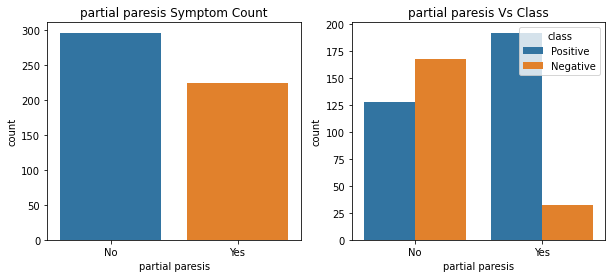

In [50]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(x='partial paresis', data=data, ax=ax[0])
ax[0].set_title("partial paresis Symptom Count")
sns.countplot(x='partial paresis',hue='class',data=data,ax=ax[1])
ax[1].set_title("partial paresis Vs Class")

Out of 224 who have partial paresis, 192 are tested positive.

#### Muscle stiffness

In [51]:
data['muscle stiffness'].value_counts()

No     325
Yes    195
Name: muscle stiffness, dtype: int64

In [52]:
data['class'].groupby(data['muscle stiffness']).value_counts()

muscle stiffness  class   
No                Positive    185
                  Negative    140
Yes               Positive    135
                  Negative     60
Name: class, dtype: int64

Text(0.5, 1.0, 'muscle stiffness Vs Class')

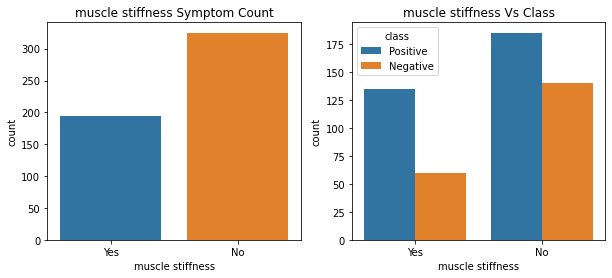

In [53]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(x='muscle stiffness', data=data, ax=ax[0])
ax[0].set_title("muscle stiffness Symptom Count")
sns.countplot(x='muscle stiffness',hue='class',data=data,ax=ax[1])
ax[1].set_title("muscle stiffness Vs Class")

Out of 195 who have muscle stiffness, 135 are tested positive.

#### Alopecia

In [54]:
data['Alopecia'].value_counts()

No     341
Yes    179
Name: Alopecia, dtype: int64

In [55]:
data['class'].groupby(data['Alopecia']).value_counts()

Alopecia  class   
No        Positive    242
          Negative     99
Yes       Negative    101
          Positive     78
Name: class, dtype: int64

Text(0.5, 1.0, 'Alopecia Vs Class')

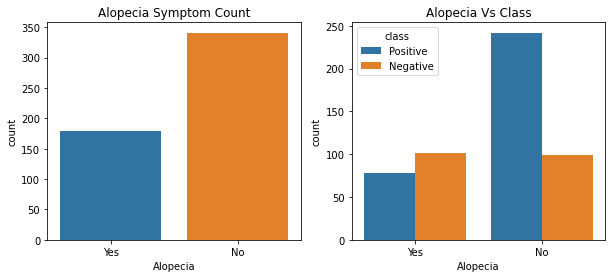

In [56]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(x='Alopecia', data=data, ax=ax[0])
ax[0].set_title("Alopecia Symptom Count")
sns.countplot(x='Alopecia',hue='class',data=data,ax=ax[1])
ax[1].set_title("Alopecia Vs Class")

Out of 179 who have Alopecia, 101 are tested positive.

#### Obesity

In [57]:
data['Obesity'].value_counts()

No     432
Yes     88
Name: Obesity, dtype: int64

In [58]:
data['class'].groupby(data['Obesity']).value_counts()

Obesity  class   
No       Positive    259
         Negative    173
Yes      Positive     61
         Negative     27
Name: class, dtype: int64

Text(0.5, 1.0, 'Obesity Vs Class')

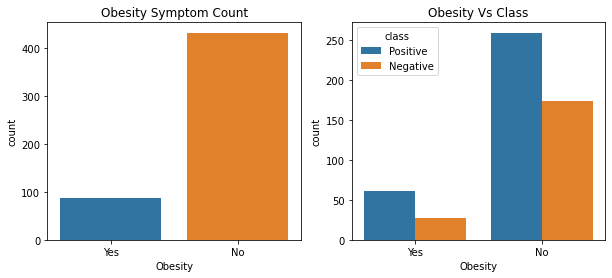

In [59]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(x='Obesity', data=data, ax=ax[0])
ax[0].set_title("Obesity Symptom Count")
sns.countplot(x='Obesity',hue='class',data=data,ax=ax[1])
ax[1].set_title("Obesity Vs Class")

Out of 88 who are obese, 61 are tested positive.

## Data Preprocessing

In [60]:
#To create a new feature 'age group'
diabetes_data=data.copy()
def age(i):
    for x in range(10,100,10):
        if i<x:
            m=f'{x-10}-{x}'
            return m

diabetes_data['age_group']=data['Age'].apply(lambda x:age(x))
diabetes_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,age_group
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,40-50
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,50-60
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,40-50
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,40-50
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,60-70


In [61]:
#Converting categorical into numberical
label_encoder = preprocessing.LabelEncoder()
for column in diabetes_data.columns[1:]:
    diabetes_data[column]=label_encoder.fit_transform(diabetes_data[column])
diabetes_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,age_group
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,3
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,4
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,3
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,3
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,5


## Model Training

#### Splitting data into independent & dependent variables

In [62]:
X=diabetes_data.drop(['class','Age'], axis=1)
y=diabetes_data['class']

#### Splitting Data as Train and Test

In [63]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=1)

In [64]:
print('The shape of X_train', X_train.shape)
print('The shape of X_test', X_test.shape)
print('The shape of y_train', y_train.shape)
print('The shape of y_test', y_test.shape)

The shape of X_train (416, 16)
The shape of X_test (104, 16)
The shape of y_train (416,)
The shape of y_test (104,)


#### Model Building

##### Logistic Regression

In [65]:
lr=LogisticRegression()

In [66]:
lr.fit(X_train, y_train)

LogisticRegression()

In [67]:
print(f'model score on training data: {lr.score(X_train, y_train)}')
print(f'model score on testing data: {lr.score(X_test, y_test)}')

model score on training data: 0.9254807692307693
model score on testing data: 0.9038461538461539


In [68]:
lr_pred = lr.predict(X_test)

In [69]:
#The predicted outcomes are added to the test dataset under the feature ‘predicted’.
diab_data_pred=pd.merge(X_test,pd.DataFrame(lr_pred,columns=['predicted']),left_index=True,right_index=True)
diab_data_pred.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,age_group,predicted
62,0,1,1,0,1,1,0,1,1,0,1,1,1,0,0,4,1
47,0,1,1,1,1,1,0,1,1,0,0,1,1,0,0,5,0
31,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,3,0
65,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,3,0
34,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,3,0


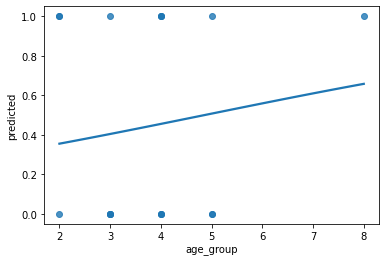

In [70]:
sns.regplot(x='age_group', y = 'predicted', data= diab_data_pred, logistic= True, ci=None);

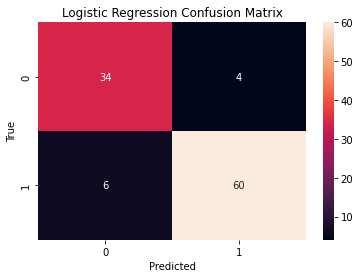

In [71]:
sns.heatmap(confusion_matrix(y_test, lr_pred), annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [72]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        38
           1       0.94      0.91      0.92        66

    accuracy                           0.90       104
   macro avg       0.89      0.90      0.90       104
weighted avg       0.91      0.90      0.90       104



##### Decision Tree Classifier

In [73]:
dt = DecisionTreeClassifier(max_depth=3, random_state=1234)
dt.fit(X, y)
dt_pred = dt.predict(X_test)
print (f'model score on training data: {dt.score(X_train, y_train)}')
print (f'model score on testing data: {dt.score(X_test, y_test)}')

model score on training data: 0.9278846153846154
model score on testing data: 0.9230769230769231


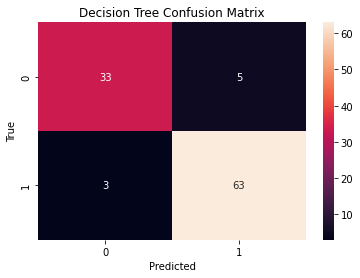

In [74]:
sns.heatmap(confusion_matrix(y_test, dt_pred), annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [75]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        38
           1       0.93      0.95      0.94        66

    accuracy                           0.92       104
   macro avg       0.92      0.91      0.92       104
weighted avg       0.92      0.92      0.92       104



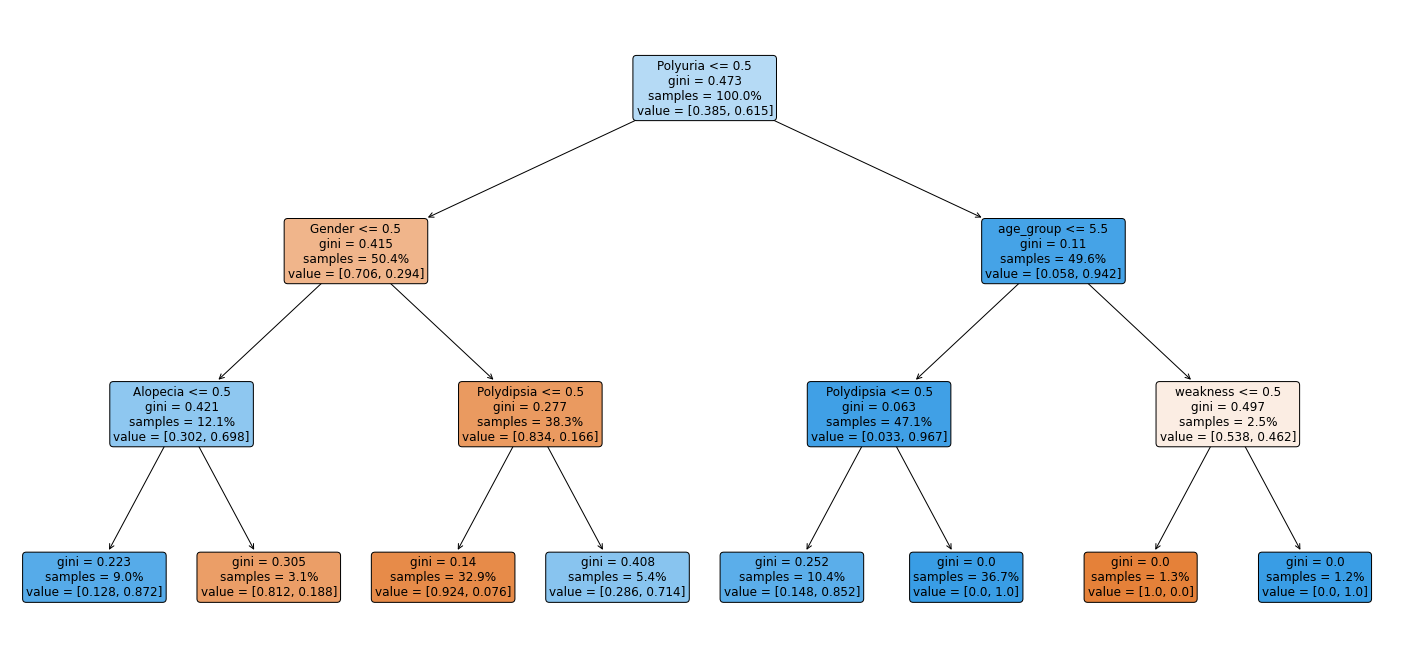

In [76]:
fig, ax = plt.subplots(figsize=(25,12))
#plot tree
plot_tree(
    decision_tree = dt,
    feature_names = X_train.columns,
    filled = True, #colour leaf with class
    rounded = True, # round leaf edges
    proportion = True, #Display proportion of classes in leaf
    max_depth = 3, # only display first 3 levels
    fontsize = 12, # Enlarge font
    ax=ax, # place in figure axis
);

##### Naive Bayes Classifier

In [77]:
nb=GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print (f'model score on training data: {nb.score(X_train, y_train)}')
print (f'model score on testing data: {nb.score(X_test, y_test)}')

model score on training data: 0.9014423076923077
model score on testing data: 0.8846153846153846


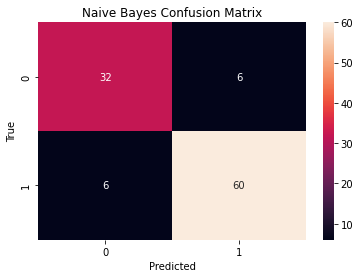

In [78]:
sns.heatmap(confusion_matrix(y_test, nb_pred), annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [79]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        38
           1       0.91      0.91      0.91        66

    accuracy                           0.88       104
   macro avg       0.88      0.88      0.88       104
weighted avg       0.88      0.88      0.88       104



##### Random Forest Classifier

In [80]:
rf = RandomForestClassifier(random_state= 10)
model=rf.fit(X_train,y_train)
rf_pred = model.predict(X_test)
print (f'model score on training data: {model.score(X_train, y_train)}')
print (f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.9927884615384616
model score on testing data: 0.9807692307692307


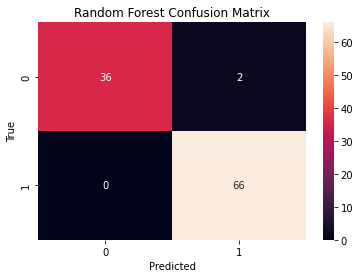

In [81]:
sns.heatmap(confusion_matrix(y_test, rf_pred), annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [82]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.97      1.00      0.99        66

    accuracy                           0.98       104
   macro avg       0.99      0.97      0.98       104
weighted avg       0.98      0.98      0.98       104



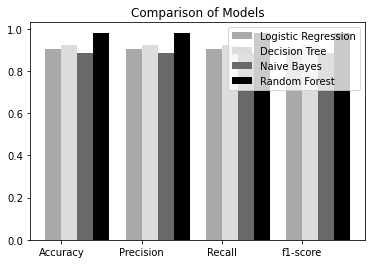

In [83]:
lr_accuracy=accuracy_score(y_test, lr_pred)
dt_accuracy=accuracy_score(y_test, dt_pred)
nb_accuracy=accuracy_score(y_test, nb_pred)
rf_accuracy=accuracy_score(y_test, rf_pred)

lr_prec_score=precision_score(y_test, lr_pred, average='weighted')
dt_prec_score=precision_score(y_test, dt_pred, average='weighted')
nb_prec_score=precision_score(y_test, nb_pred, average='weighted')
rf_prec_score=precision_score(y_test, rf_pred, average='weighted')

lr_recall_score=recall_score(y_test, lr_pred, average='weighted')
dt_recall_score=recall_score(y_test, dt_pred, average='weighted')
nb_recall_score=recall_score(y_test, nb_pred, average='weighted')
rf_recall_score=recall_score(y_test, rf_pred, average='weighted')

lr_fscore=f1_score(y_test, lr_pred, average='weighted')
dt_fscore=f1_score(y_test, dt_pred, average='weighted')
nb_fscore=f1_score(y_test, nb_pred, average='weighted')
rf_fscore=f1_score(y_test, rf_pred, average='weighted')

metrics=['Accuracy','Precision','Recall','f1-score']
logis=[lr_accuracy, lr_prec_score, lr_recall_score, lr_fscore]
decision=[dt_accuracy, dt_prec_score, dt_recall_score, dt_fscore]
naive=[nb_accuracy,nb_prec_score,nb_recall_score,nb_fscore]
random=[rf_accuracy, rf_prec_score, rf_recall_score,rf_fscore]

x_axis=np.arange(len(metrics))
plt.bar(x_axis+0.20,logis,width=0.2,label='Logistic Regression',color='darkgrey')
plt.bar(x_axis+0.20*2,decision,width=0.2,label='Decision Tree',color='gainsboro')
plt.bar(x_axis+0.20*3,naive,width=0.2,label='Naive Bayes',color='dimgrey')
plt.bar(x_axis+0.20*4,random,width=0.2,label='Random Forest', color='black')

plt.xticks(x_axis+0.30,metrics)
plt.title('Comparison of Models')
plt.legend()
plt.show()

Random Forest classifier performed well and I decided that it would be the model I would Select.

In [84]:
import pickle
pickle.dump(model, open("rf.pkl", "wb"))